# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "5d2e2f177ca4a0a3f9a16782c4ade136f892ead0"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O options_bear_call_ladder.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_bear_call_ladder.py
! sed -i '1s/^/from pyalgotrading.strategy.strategy_options_base_v2 import *\n/' options_bear_call_ladder.py

In [5]:
from options_bear_call_ladder import StrategyOptionsBearCallLadder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134279,
 'strategyId': '8260078305994dae89524c041e7f5a31'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('NIFTY BANK', exchange='NSE')
instrument

[{'id': 5669, 'value': 'NSE:NIFTY BANK'}]

## Setup Parameters

In [9]:
parameters = {
    'LEG_ONE_NUMBER_OF_STRIKES': 0,
    'LEG_ONE_STRIKE_DIRECTION': 1,
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_ONE_TRANSACTION_TYPE': 1,
    
    'LEG_THREE_NUMBER_OF_STRIKES': 2,
    'LEG_THREE_STRIKE_DIRECTION': 0,
    'LEG_THREE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_THREE_TRANSACTION_TYPE': 2,
    
    'LEG_TWO_NUMBER_OF_STRIKES': 2,
    'LEG_TWO_STRIKE_DIRECTION': 2,
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_TWO_TRANSACTION_TYPE': 1
}

In [10]:
initial_virtual_funds = 1450000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530',  
    instrument='NSE:NIFTY BANK', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Bear Call Ladder Template' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Options Bear Call Ladder Template      │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY BANK']                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 10                                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp      

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NFO,BANKNIFTY28JUL2236400CE,2022-07-27 09:15:00+05:30,BUY,150,₹,197.15,2022-07-27 15:30:00+05:30,SELL,150,₹,454.30,38572.5,38572.5,0,38572.5
1,NFO,BANKNIFTY28JUL2236600CE,2022-07-27 09:15:00+05:30,SELL,150,₹,110.00,2022-07-27 15:30:00+05:30,BUY,150,₹,306.05,-29407.5,9165.0,0,-29407.5
2,NFO,BANKNIFTY28JUL2236600CE,2022-07-27 09:15:00+05:30,BUY,150,₹,110.00,2022-07-27 15:30:00+05:30,SELL,150,₹,306.05,29407.5,38572.5,0,29407.5
3,NFO,BANKNIFTY28JUL2237300CE,2022-07-28 09:15:00+05:30,SELL,150,₹,62.00,2022-07-28 15:30:00+05:30,BUY,150,₹,72.30,-1545.0,37027.5,0,-1545.0
4,NFO,BANKNIFTY28JUL2237300CE,2022-07-28 09:15:00+05:30,BUY,150,₹,62.00,2022-07-28 15:30:00+05:30,SELL,150,₹,72.30,1545.0,38572.5,0,1545.0
5,NFO,BANKNIFTY28JUL2237100CE,2022-07-28 09:15:00+05:30,BUY,150,₹,110.50,2022-07-28 15:30:00+05:30,SELL,150,₹,272.15,24247.5,62820.0,0,24247.5
6,NFO,BANKNIFTY04AUG2237900CE,2022-07-29 09:15:00+05:30,SELL,150,₹,217.65,2022-07-29 15:30:00+05:30,BUY,150,₹,178.50,5872.5,68692.5,0,5872.5
7,NFO,BANKNIFTY04AUG2237900CE,2022-07-29 09:15:00+05:30,BUY,150,₹,217.65,2022-07-29 15:30:00+05:30,SELL,150,₹,178.50,-5872.5,62820.0,0,-5872.5
8,NFO,BANKNIFTY04AUG2237700CE,2022-07-29 09:15:00+05:30,BUY,150,₹,334.40,2022-07-29 15:30:00+05:30,SELL,150,₹,253.85,-12082.5,50737.5,0,-12082.5
9,NFO,BANKNIFTY04AUG2237800CE,2022-08-01 09:15:00+05:30,SELL,150,₹,220.00,2022-08-01 15:30:00+05:30,BUY,150,₹,311.05,-13657.5,37080.0,0,-13657.5


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-07-27
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -22.69%
CAGR﹪              -22.47%

Sharpe              -0.18
Prob. Sharpe Ratio  42.87%
Sortino             -0.29
Sortino/√2          -0.21
Omega               0.97

Max Drawdown        -42.47%
Longest DD Days     318

Gain/Pain Ratio     -0.03
Gain/Pain (1M)      -0.19

Payoff Ratio        1.41
Profit Factor       0.97
Common Sense Ratio  1.42
CPC Index           0.56
Tail Ratio          1.47
Outlier Win Ratio   4.0
Outlier Loss Ratio  3.62

MTD                 0.12%
3M                  -5.48%
6M                  -12.42%
YTD                 -30.72%
1Y                  -24.22%
3Y (ann.)           -22.47%
5Y (ann.)           -22.47%
10Y (ann.)          -22.47%
All-time (ann.)     -22.47%

Avg. Drawdown       -8.2%
Avg. Drawdown Days  39
Recovery Factor     -0.53
Ulcer Index         0.27
Serenit

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-07-27
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -22.69%
CAGR﹪                     -22.47%

Sharpe                     -0.18
Prob. Sharpe Ratio         42.87%
Smart Sharpe               -0.12
Sortino                    -0.29
Smart Sortino              -0.2
Sortino/√2                 -0.21
Smart Sortino/√2           -0.14
Omega                      0.97

Max Drawdown               -42.47%
Longest DD Days            318
Volatility (ann.)          56.68%
Calmar                     -0.53
Skew                       0.9
Kurtosis                   2.89

Expected Daily %           -0.1%
Expected Monthly %         -1.96%
Expected Yearly %          -12.07%
Kelly Criterion            -1.36%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.91%
Expected Shortfall (cVaR)  -5.91%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-09-16,2023-07-17,2023-07-31,318,-42.472053,-41.470320
2,2022-08-22,2022-08-23,2022-08-25,3,-9.203957,-2.912525
3,2022-08-26,2022-08-30,2022-09-01,6,-8.921846,-2.104633
4,2022-09-07,2022-09-14,2022-09-15,8,-6.141205,-3.499727
5,2022-08-05,2022-08-08,2022-08-12,7,-3.104391,-1.196662


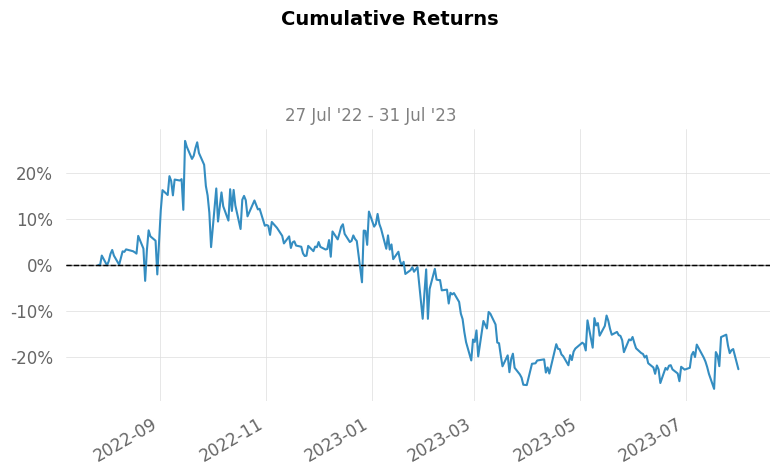

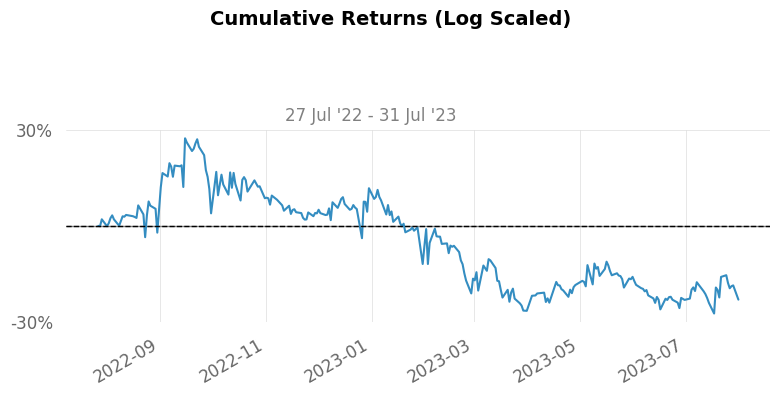

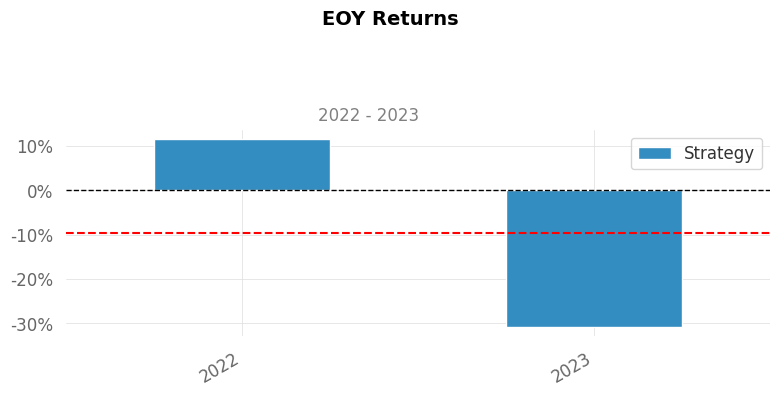

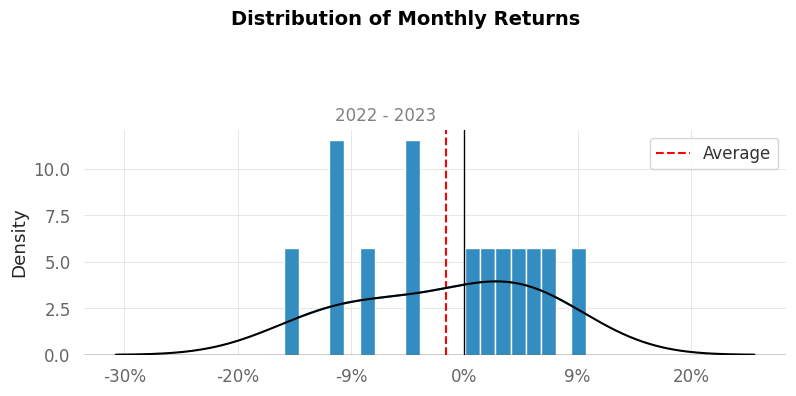

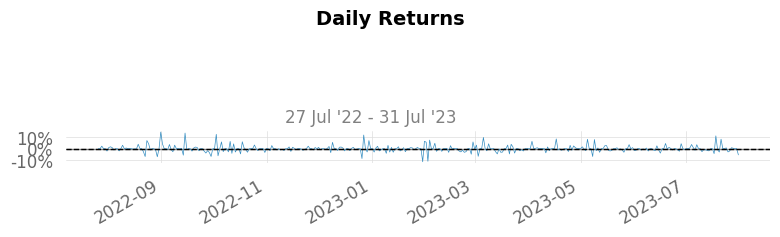

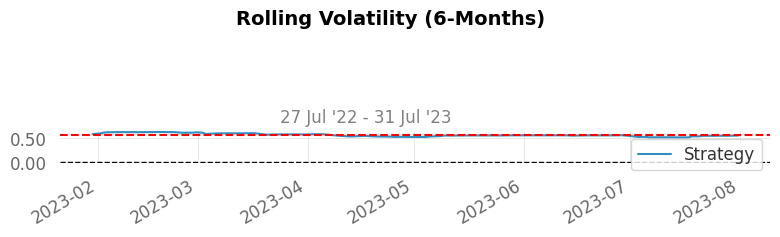

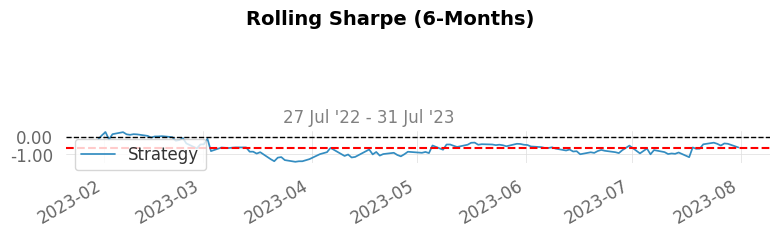

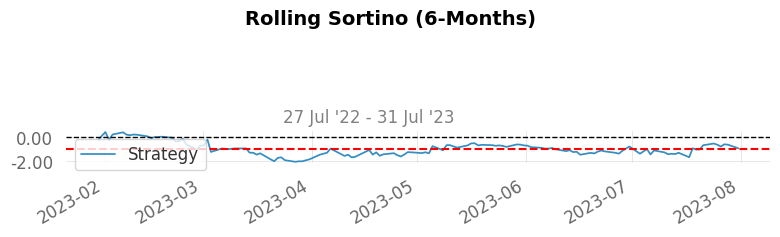

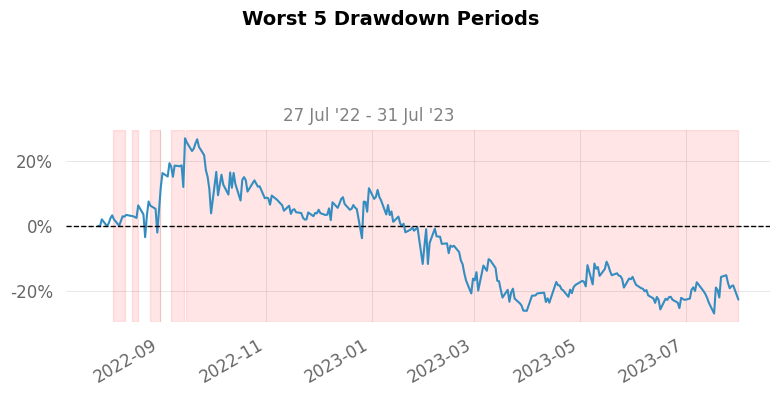

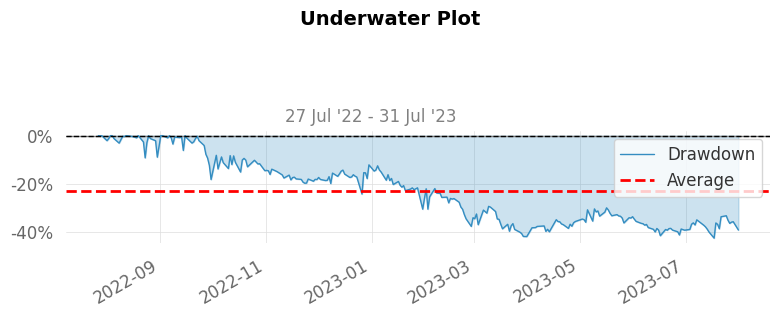

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


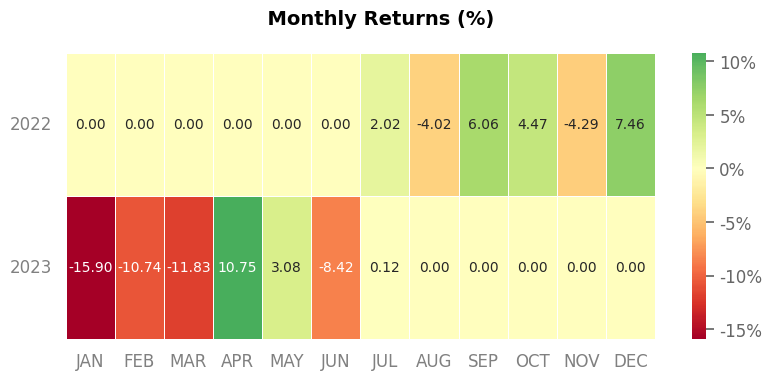

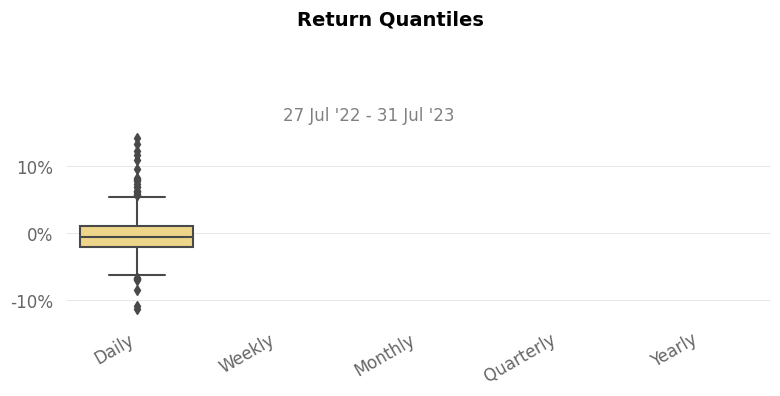

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | c1abc4380dfe4243bd42722514edae16 |
| Transaction Type | BUY                              |
| Instrument       | NSE:BANKNIFTY03AUG2345700CE      |
| Quantity         | 150                              |
| Price            | ₹191.7                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-21T12:01:52.389721Z | COMPLETE               |
| 2023-10-21T12:01:52.389703Z | OPEN                   |
| 2023-10-21T12:01:52.389683Z | OPEN PENDING           |
| 2023-10-21T12:01:52.389661Z | VALIDATION PENDING     |
| 2023-10-21T12:01:52.389600Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 1d88698131a1400fa

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)